# Analytical Dataset Exploration

## Date Created: 1/20/22
## Date Modified: 2/26/22 (Millie)

### Authors: Geri, Millie, JJ

This notebook serves as a place to do data exploration on the `initial_analytic_dataset.csv` which holds all the variables of interest from each of our respective datasets. This is a place to look at the relationships between variables and other assumption checks.

At the end of this notebook we are create a final analytic dataset for further analysis, visualizations and modeling. Once confirmed, this notebook will be convered into a script. 

In [1]:
#Packages import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Dataset Introduction

This `initial_analytic_dataset.csv` holds all the columns of interest from the first round of data cleaning. The data includes high level information starting with population data for all county areas, then broadband connection percent, households median income, unemployment rates, and ends with information about devices in each household. These variables were chosen because factors, such as income ane unemployment, may have a relationship or impact whether or not households have access to technology or internet. 

Later in the notebook, other columns will be created with addtional datasets, such as region and division, to visualize factors in subsections of the country. 

In [2]:
file = open("initial_analytic_dataset.csv", "r")
analytic_data = pd.read_csv("initial_analytic_dataset.csv")

In [3]:
for col in analytic_data.columns:
    print(col)

id
pop_total
county
state
pop_class
year
broadband_pct
total_pop_enrolled
percent_total_pop_enrolled
margin_total_pop
est_total_households_frm_income
est_med_income_households
est_total_families
est_med_income_families
est_total_pop_16_over
est_emp_pop_ratio_16_over
est_unemp_pop_ratio_16_over
est_total_households_frm_devices
est_total_households_with_device
est_total_households_with_desktop
est_total_households_with_no
est_total_households_with_smartphone
est_total_households_with_no2
est_total_households_with_portable
est_total_households_with_no3
est_total_households_with_other
est_total_households_with_no4
est_total_households_none
est_total_households_with_sub
est_total_households_with_du
est_total_households_with_broadband
est_total_households_with_cellular
est_total_households_with_cell_no
est_total_households_with_cable
est_total_households_with_sat
est_total_households_without_sub
pct_total_households_with_device
pct_total_households_with_desktop
pct_total_households_with_no
p

Note from Millie: @JJ - Can you provide documentation onw hat the different "est_total_households_with_no" are? I am assuming that it mean no for a specific device, perhaps the one above, but I would like that confirmed.

In [4]:
# Reformating broadband_pct
analytic_data["broadband_pct"] = analytic_data["broadband_pct"] *100
analytic_data["broadband_pct"]

0       78.899997
1       78.099996
2       60.399997
3       66.100001
4       68.500000
          ...    
3217          NaN
3218          NaN
3219          NaN
3220          NaN
3221    79.100001
Name: broadband_pct, Length: 3222, dtype: float64

---

## EDA Exploration

Under this section, we are graphing the relationship between variables overall. Later on region is added to the dataset to look at the relationsips in smaller subsections to gather more insights. 

#### Broadband Percent v. Percent Total Population Enrolled

Text(0.5, 0, 'Broadband Percentage')

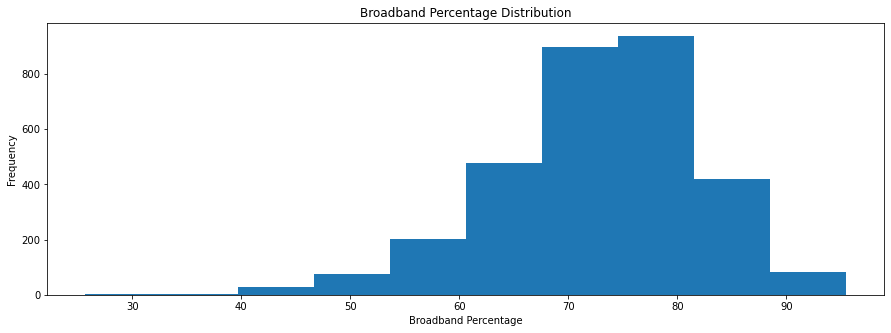

In [5]:
analytic_data["broadband_pct"].plot.hist(figsize=(15, 5))
plt.title("Broadband Percentage Distribution")
plt.xlabel("Broadband Percentage")

Text(0.5, 0, 'Total Pop Enrolled')

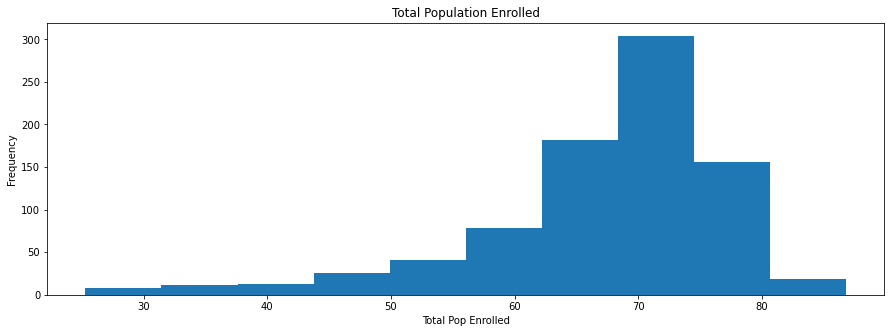

In [6]:
analytic_data["percent_total_pop_enrolled"].plot.hist(figsize=(15, 5))
plt.title("Total Population Enrolled")
plt.xlabel("Total Pop Enrolled")

Text(0, 0.5, 'Total Population Enrolled')

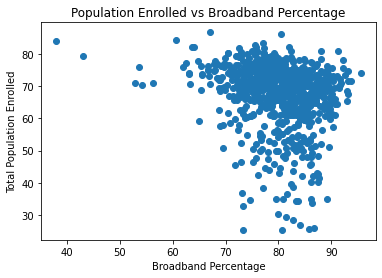

In [7]:
plt.scatter(x = analytic_data["broadband_pct"], y = analytic_data["percent_total_pop_enrolled"]) # The plot
plt.title("Population Enrolled vs Broadband Percentage") # Adding a title
plt.xlabel("Broadband Percentage") # Adding axis labels
plt.ylabel("Total Population Enrolled")

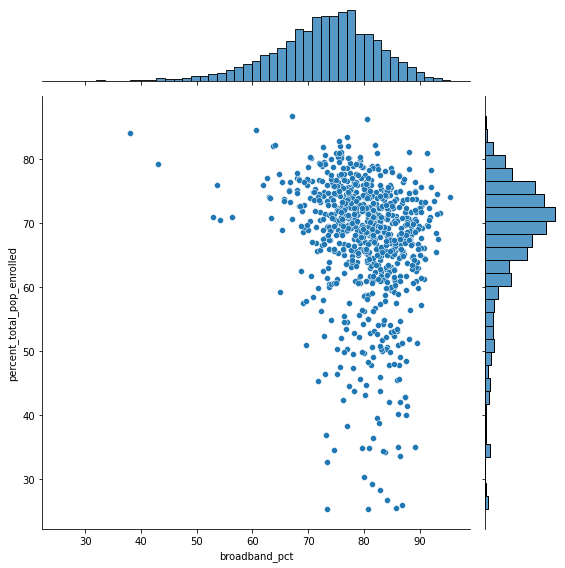

In [8]:
#Note from Millie: I added this plot because I thought it might be more useful than looking at three different plots
sns.jointplot(data = analytic_data, x = "broadband_pct", y = "percent_total_pop_enrolled", height = 8); 

In [9]:
#### Broadband Percent vs Unemployment

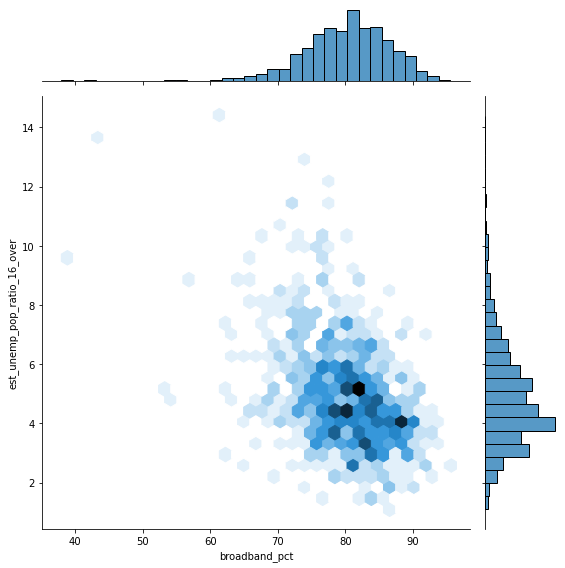

In [10]:
sns.jointplot(data = analytic_data, x = "broadband_pct", y = "est_unemp_pop_ratio_16_over", 
              kind = "hex", height = 8); 

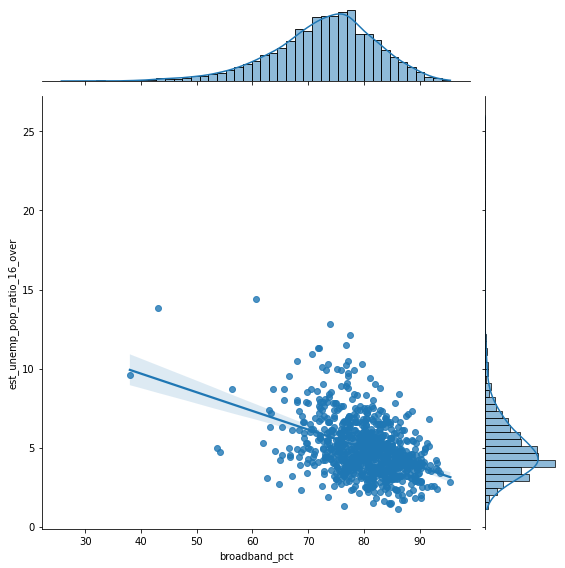

In [11]:
sns.jointplot(data = analytic_data, x = "broadband_pct", y = "est_unemp_pop_ratio_16_over", 
              kind = "reg", height = 8); 

### Distrubution of Devices in Households

For now, looking at all households with some sort of device against total households.

In [12]:
#selecting certian variables
devices_in_hh = analytic_data[['id','est_total_households_frm_devices',
'est_total_households_with_device',
'est_total_households_with_desktop',
'est_total_households_with_smartphone',
'est_total_households_with_portable',
'est_total_households_with_other',
'est_total_households_none']]

In [13]:
#choosing columns to pivot
to_pivot = devices_in_hh[[
'est_total_households_with_device',
'est_total_households_with_desktop',
'est_total_households_with_smartphone',
'est_total_households_with_portable']]

#reshaping data
plot_devices_df = pd.melt(devices_in_hh, id_vars = 'id', value_vars = to_pivot, var_name = "type", value_name = "value")

#creating a separate value column to place decimal in different place
plot_devices_df['value2'] = plot_devices_df['value']*.001

In [14]:
plot_devices_df.describe()

,value,value2
count,3.284000e+03,3284.000000
mean,2.689772e+04,26.897725
std,5.226474e+04,52.264741
min,2.178000e+03,2.178000
25%,6.914000e+03,6.914000
50%,1.214100e+04,12.141000
75%,2.669300e+04,26.693000
max,1.348569e+06,1348.569000


There is a huge std and data is heavily skewed to the right. 

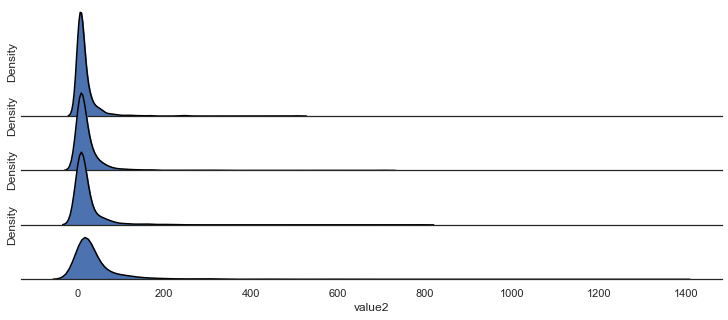

In [15]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(plot_devices_df, row="type", aspect=9, height=1.2, palette = pal)

g.map_dataframe(sns.kdeplot, x="value2", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="value2", color='black')
g.fig.subplots_adjust(hspace=-.5)


g.set_titles("")
g.set(yticks=[])
g.despine(left=True)

#### Employment Data Distribution

In [16]:
employment_info = analytic_data[['id', 'est_total_pop_16_over', 'est_emp_pop_ratio_16_over', 
                                 'est_unemp_pop_ratio_16_over']]

plot_employ_df = pd.melt(employment_info, id_vars = 'id', value_vars = ['est_emp_pop_ratio_16_over', 
                                 'est_unemp_pop_ratio_16_over'], var_name = "type", value_name = "value")

plot_employ_df['value2'] = plot_devices_df['value']*.001

plot_employ_df.describe()


,value,value2
count,1642.000000,1642.000000
mean,31.830390,20.399951
std,27.257013,35.263328
min,1.100000,2.178000
25%,4.600000,5.733000
50%,24.800000,9.967500
75%,59.175000,21.804000
max,76.500000,701.010000


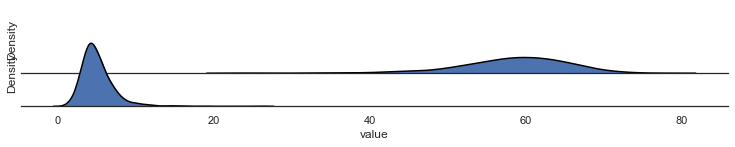

In [17]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(plot_employ_df, row="type", aspect=9, height=1.2, palette = pal)

g.map_dataframe(sns.kdeplot, x="value", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="value", color='black')
g.fig.subplots_adjust(hspace=-.5)


g.set_titles("")
g.set(yticks=[])
g.despine(left=True)

Density plot above is incomplete. Currently troubleshooting. 

References for facet density plot:
- https://seaborn.pydata.org/examples/kde_ridgeplot.html
- https://python.plainenglish.io/ridge-plots-with-pythons-seaborn-4de5725881af

---

## Adding Region Dimension to the Analytic Data

This is to make it easier to breakdown the data visuals so we are not looking at the entire country on one level. All visuals below are exploring with region column. 

In [18]:
regions = pd.read_csv("https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv")
regions.columns = regions.columns.str.lower().str.replace(" ", "_")
regions

,state,state_code,region,division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific
5,Colorado,CO,West,Mountain
6,Connecticut,CT,Northeast,New England
7,District of Columbia,DC,South,South Atlantic
8,Delaware,DE,South,South Atlantic
9,Florida,FL,South,South Atlantic


In [19]:
revised_analytic_data = analytic_data.merge(regions, on = "state")

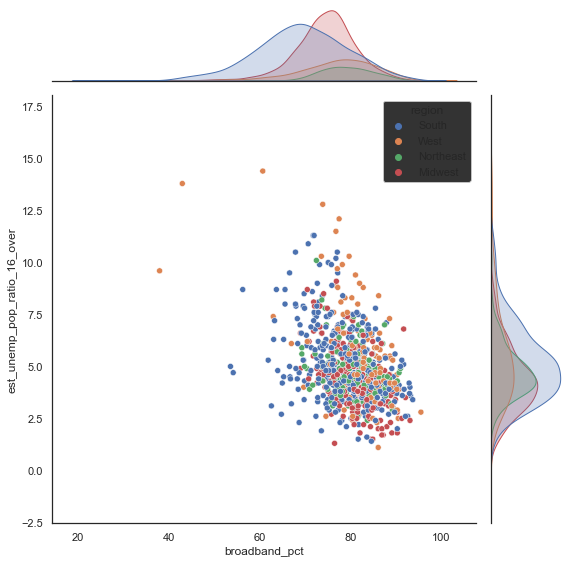

In [20]:
sns.jointplot(data = revised_analytic_data, x = "broadband_pct", y = "est_unemp_pop_ratio_16_over", 
             hue = "region", height = 8); 

### Broadband Percent by Region

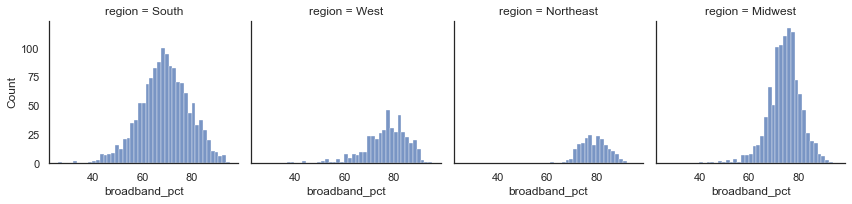

In [21]:
#broadband percent
bb_region = revised_analytic_data[['id', 'region', 'broadband_pct']]
sns.displot(
    bb_region, x="broadband_pct", col="region",
     height=3, facet_kws=dict(margin_titles=True),
);

Viusally speaking, there seems to be a differnce by region when looking at the broadband percentage with the South trailing behind the rest of the regions.

### Unemployment Ratio by Region

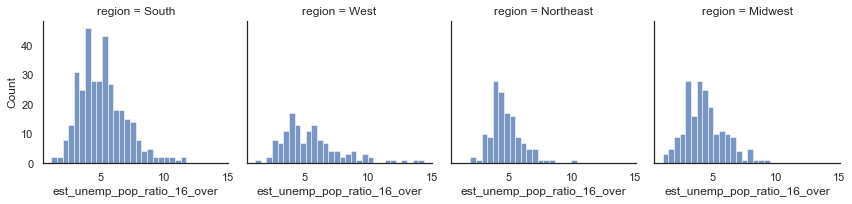

In [22]:
#umemployment ratio
sns.displot(
    revised_analytic_data, x="est_unemp_pop_ratio_16_over", col="region",
    height=3, facet_kws=dict(margin_titles=True)
);

Visually, the unemployment rate seens to around 5% by reion, except for the midwest where it appears to be lower. 

### Median Income by Region

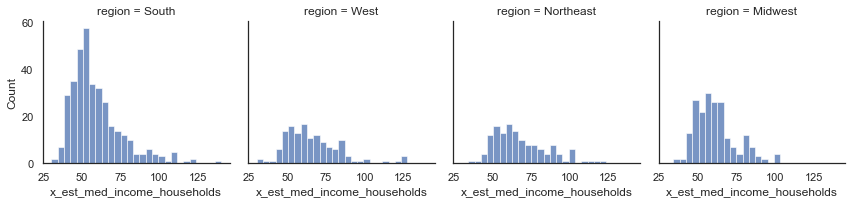

In [23]:
#creating a separate value column to place decimal in different place
revised_analytic_data['x_est_med_income_households'] = revised_analytic_data['est_med_income_households']*.001

#median income
sns.displot(
    revised_analytic_data, x="x_est_med_income_households", col="region",
    height=3, facet_kws=dict(margin_titles=True),
);


### Analyzing Population Classification
Many Rural and Micro Areas do not have Census data for most of our data. Therefore, for smaller, more rural areas, we can only look at broadband data. We may consider breaking down the Metro Areas into different bins.

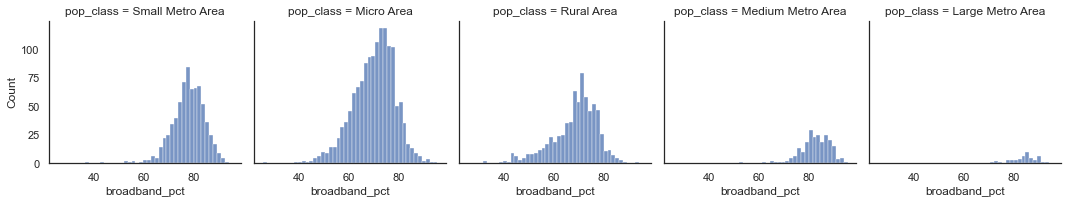

In [24]:
#creating a separate value column to place decimal in different place
revised_analytic_data['broadband_pct'] = revised_analytic_data['broadband_pct']

#median income
sns.displot(
    revised_analytic_data, x="broadband_pct", col="pop_class",
    height=3, facet_kws=dict(margin_titles=True),
);


------

## Adding Internet Price Data

- Internet prices are on the state level, therefore all counties in the state will get the same price
- Each column on price is in US dollars as the cost per mbps
- Columns ending in a number is the total price for the for X mbps package
    - 25 is the lowest recommended amount for any household to be functional (low end)
    - 100 is the lowest recommended amount for a household of 4 (optimal low end)

In [25]:
internet_price = pd.read_csv("Initial Clean Data/internet_price_data.csv")
revised_analytic_data = revised_analytic_data.merge(internet_price, on = "state", how = "outer")

---

## Creating Scores

#### Notes and Reminders

We are scoring variables to have an easier way to show the levels of need in the counties. At this point in the code. The higher the score the lesser the need (we might have to reverse that). 

### Income

There are various definition of poverty level or income thresholds depending on the size of the household and location. This doucmentation on poverty level for 2018 give thresholds for up to 8 persons in a household: https://aspe.hhs.gov/topics/poverty-economic-mobility/poverty-guidelines/prior-hhs-poverty-guidelines-federal-register-references/2018-poverty-guidelines

There is additional documentation households data here:https://www.census.gov/quickfacts/fact/note/US/HSD410219

With this new information, instead of choosing an arbitruary number of persons in a household and blindly applying it to all, we will need to add infomration from the households and families dataset. 

Note: Millie is creating a new notebook to view and test the data cleaning and then merging it into the initial clean dataset. 

For simplicity, we are working with the median income for households only (we can include families later if we are interested in that feature). We are applying the highest poverty level to all counties. 

In [26]:
#Observing income information 
income_info = analytic_data[['id','est_total_households_official', 'est_avg_household_size',
                             'est_med_income_households',
                             'est_total_families_official','est_avg_families_size',
                             'est_med_income_families']]

income_info["rnd_avg_household_size"] = income_info.loc[:,('est_avg_household_size')].round(0)
income_info["rnd_avg_families_size"] = income_info.loc[:, ('est_avg_families_size')].round(0)
#trying to get rid of the "setting with copy" warning


C:\Users\gerim\AppData\Local\Temp/ipykernel_59488/2712425641.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_info["rnd_avg_household_size"] = income_info.loc[:,('est_avg_household_size')].round(0)
C:\Users\gerim\AppData\Local\Temp/ipykernel_59488/2712425641.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_info["rnd_avg_families_size"] = income_info.loc[:, ('est_avg_families_size')].round(0)


C:\Users\gerim\AppData\Local\Temp/ipykernel_59488/4024265566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_info["mod_est_med_income_households"] = income_info["est_med_income_households"]*.001


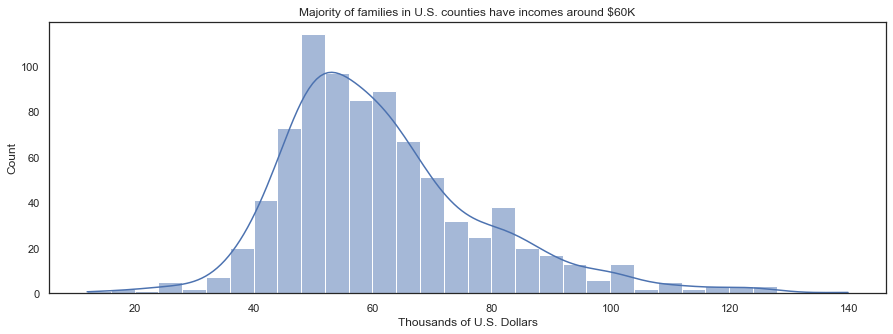

In [27]:
income_info["mod_est_med_income_households"] = income_info["est_med_income_households"]*.001

plt.figure(figsize=(15, 5))
sns.histplot(data=income_info,
             x="mod_est_med_income_households",
             kde=True)
plt.xlabel("Thousands of U.S. Dollars")
plt.title("Majority of families in U.S. counties have incomes around $60K"); 

In [28]:
income_info["rnd_avg_household_size"].unique() #highest avg household is 4

array([nan,  3.,  2.,  4.])

In [29]:
income_info["rnd_avg_families_size"].unique() # highest family household is 5

array([nan,  3.,  4.,  5.,  2.])

In [30]:
#Creating text label for income 
def income_label(est_med_income_households):
    """Assign labels to med county income and household size
    """
    if est_med_income_households < 31380: # highest poverty line is household of 4 in Alaska
        label = "Below Poverty Line"
    elif est_med_income_households >= 31380 and est_med_income_households < 50000: 
        label = "Just Above Poverty"
    elif est_med_income_households >= 50000 and est_med_income_households < 70000: 
        label = "Middle Income"
    elif est_med_income_households >= 70000 and est_med_income_households < 90000: 
        label = "Upper Middle Income"
    elif est_med_income_households >= 90000 and est_med_income_households != 'nan': 
        label = "Upper Income"
    else: #Greater than or equal to 90k
        label = "Unknown"
    return label

#Creating the dict for numeric score of income 
income_score_dict = dict({'Below Poverty Line': 5, 
                         'Just Above Poverty': 4,
                         'Middle Income': 3, 
                         'Upper Middle Income': 2, 
                         'Upper Income': 1})

#applying the labels
revised_analytic_data["income_label"] = revised_analytic_data["est_med_income_households"].apply(income_label)

#applying the score
revised_analytic_data["income_score"] = revised_analytic_data["income_label"].map(income_score_dict)

As you may notice the income score has fewer non-null values than income_label and that is because a score was not applied if the label == "Unknown"

In [31]:
check1 = revised_analytic_data[["id", "income_label", "income_score"]]

check1 = check1.groupby(["income_label", "income_score"]).count()

check1

,,id
income_label,income_score,
Below Poverty Line,5.0,1
Just Above Poverty,4.0,192
Middle Income,3.0,430
Upper Income,1.0,56
Upper Middle Income,2.0,148


## Device Score (by each device)

### Desktop Percent Score

NOTE FROM JJ: Nan values are being considered as 0 let me know if this is what we want to do and I can adjust.

In [32]:
def pct_desktop_rank(pct_total_households_with_desktop):
    """Assign labels to county according to their broadband pct
    """
    if pct_total_households_with_desktop >= 50.963 and pct_total_households_with_desktop < 59.495: ##Less than 2 standard deviations below
        label = 5
    elif pct_total_households_with_desktop < 68.027: ##Less than 1 standard deviations below
        label = 4
    elif pct_total_households_with_desktop < 85.091: ##Less than 1 standard deviations above
        label = 3
    elif pct_total_households_with_desktop < 93.623: ##Less than 2 standard deviations above
        label = 2
    elif pct_total_households_with_desktop > 93.623 and pct_total_households_with_desktop < 105.155: ##Greater than 2 standard deviations above
        label = 1   
    else: 
        label = float("nan")
    return label
revised_analytic_data["desktop_rank"] = revised_analytic_data["pct_total_households_with_desktop"].apply(pct_desktop_rank)


In [33]:
revised_analytic_data["desktop_rank"].value_counts()

3.0    590
2.0    130
4.0     97
5.0      8
1.0      2
Name: desktop_rank, dtype: int64

### Smartphone Score

In [34]:
def pct_smartphone_rank(pct_total_households_with_smartphone):
    """Assign labels to county according to their broadband pct
    """
    if pct_total_households_with_smartphone >= 66.27 and pct_total_households_with_smartphone < 71.983 : ##Less than 2 standard deviations below
        label = 5
    elif pct_total_households_with_smartphone < 77.696: ##Less than 1 standard deviations below
        label = 4
    elif pct_total_households_with_smartphone < 89.122: ##Less than 1 standard deviations above
        label = 3
    elif pct_total_households_with_smartphone < 94.835: ##Less than 2 standard deviations above
        label = 2
    elif pct_total_households_with_smartphone > 94.835 and pct_total_households_with_smartphone < 100.548: ##Greater than 2 standard deviations above
        label = 1  
    else: 
        label = float("nan")
    return label
revised_analytic_data["smartphone_rank"] = revised_analytic_data["pct_total_households_with_smartphone"].apply(pct_smartphone_rank)



In [35]:
revised_analytic_data["smartphone_rank"].value_counts()

3.0    599
2.0    119
4.0     87
5.0     19
1.0      3
Name: smartphone_rank, dtype: int64

### Portable Device Score

In [36]:
def pct_portable_rank(pct_total_households_with_portable):
    """Assign labels to county according to their broadband pct
    """
    if pct_total_households_with_portable >= 36.78 and pct_total_households_with_portable < 45.083: ##Less than 2 standard deviations below
        label = 5
    elif pct_total_households_with_portable <  53.386: ##Less than 1 standard deviations below
        label = 4
    elif pct_total_households_with_portable < 69.992: ##Less than 1 standard deviations above
        label = 3
    elif pct_total_households_with_portable < 78.295: ##Less than 2 standard deviations above
        label = 2
    elif pct_total_households_with_portable > 78.295 and pct_total_households_with_portable < 86.598: ##Greater than 2 standard deviations above
        label = 1   
    else: 
        label = float("nan")
    return label
revised_analytic_data["portable_rank"] = revised_analytic_data["pct_total_households_with_portable"].apply(pct_portable_rank)


In [37]:
revised_analytic_data["portable_rank"].value_counts()

3.0    616
2.0    104
4.0     77
1.0     17
5.0     13
Name: portable_rank, dtype: int64

### No Device Score

In [38]:
def pct_no_device_rank(pct_total_households_no_device):
    """Assign labels to county according to their broadband pct
    """
    if pct_total_households_no_device  >= -(4.192) and pct_total_households_no_device < 0.096: ##Less than 2 standard deviations below
        label = 5
    elif pct_total_households_no_device < 4.384: ##Less than 1 standard deviations below
        label = 4
    elif pct_total_households_no_device < 12.96: ##Less than 1 standard deviations above
        label = 3
    elif pct_total_households_no_device < 17.248: ##Less than 2 standard deviations above
        label = 2
    elif pct_total_households_no_device > 17.248 and pct_total_households_no_device < 21.536: ##Greater than 2 standard deviations above
        label = 1   
    else: 
        label = float("nan")
    return label
revised_analytic_data["no_device_rank"] = revised_analytic_data["pct_total_households_no_device"].apply(pct_no_device_rank)


In [39]:
revised_analytic_data["no_device_rank"].value_counts()

3.0    651
4.0     92
2.0     66
1.0     13
Name: no_device_rank, dtype: int64

## Broadband Score

Broadband Percentage Score was assigned using percentage ranges defined by Census Bureau Data Article found at https://www.census.gov/library/stories/2018/12/rural-and-lower-income-counties-lag-nation-internet-subscription.html. Scores were assigned with 5 being the lowest percentage and 1 being the highest percentage. 

In [40]:
revised_analytic_data["broadband_pct"].describe()

count    3132.000000
mean       72.689687
std         9.252030
min        25.700000
25%        67.400002
50%        73.600000
75%        78.800005
max        95.499998
Name: broadband_pct, dtype: float64

In [41]:
#creating broadband classification
def bdbd_type(broadband_pct):
    """Assign labels to county according to their broadband pct
    """
    if broadband_pct < 54.9 : #Between 0.0 to 54.9
        label = 5
    elif broadband_pct < 64.9: #Between 55.0 to 64.9
        label = 4
    elif broadband_pct < 74.9: #Between 65.0 to 74.9
        label = 3
    elif broadband_pct < 84.9: #Between 75.0 to 84.9
        label = 2
    elif broadband_pct > 85.0: #Greater than 85.0
        label = 1  
    else: 
        label = 5
    return label

In [42]:
revised_analytic_data["bdbd_score"] = revised_analytic_data["broadband_pct"].apply(bdbd_type)

In [53]:
revised_analytic_data["bdbd_score"].value_counts()

2    1170
3    1152
4     443
1     232
5     147
Name: bdbd_score, dtype: int64

In [43]:
#Selecting only columns of interest
review5 = revised_analytic_data[["id", "bdbd_score"]]

#grouping by newly created "portable_rank" and counting 
review5 = review5.groupby("bdbd_score").count()

review5

,id
bdbd_score,
1,232
2,1170
3,1152
4,443
5,146


In [44]:
bdbd_df = revised_analytic_data[["county", "state","pop_total", "pop_class", "broadband_pct", "bdbd_score"]]
bdbd_df

,county,state,pop_total,pop_class,broadband_pct,bdbd_score
0,Autauga County,Alabama,58805.0,Small Metro Area,78.899997,2
1,Baldwin County,Alabama,231767.0,Small Metro Area,78.099996,2
2,Barbour County,Alabama,25223.0,Micro Area,60.399997,4
3,Bibb County,Alabama,22293.0,Micro Area,66.100001,3
4,Blount County,Alabama,59134.0,Small Metro Area,68.500000,3
...,...,...,...,...,...,...
3139,Teton County,Wyoming,23331.0,Micro Area,85.899997,1
3140,Uinta County,Wyoming,20450.0,Micro Area,88.200003,1
3141,Washakie County,Wyoming,7685.0,Rural Area,78.299993,2
3142,Weston County,Wyoming,6838.0,Rural Area,73.299998,3


In [45]:
corrz = bdbd_df.corr()
corrz

,pop_total,broadband_pct,bdbd_score
pop_total,1.000000,0.268957,-0.255857
broadband_pct,0.268957,1.000000,-0.948628
bdbd_score,-0.255857,-0.948628,1.000000


In [46]:
my_contingency_table = pd.crosstab(index=bdbd_df["pop_class"], columns=bdbd_df["bdbd_score"])
my_contingency_table

bdbd_score,1,2,3,4,5
pop_class,,,,,
Large Metro Area,24,22,3,0,0
Medium Metro Area,82,128,15,2,1
Micro Area,34,410,621,290,64
Rural Area,8,177,337,136,75
Small Metro Area,84,433,176,15,6


<AxesSubplot:xlabel='bdbd_score', ylabel='pop_class'>

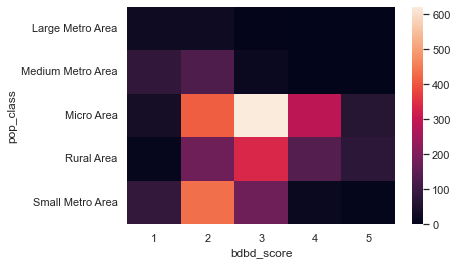

In [47]:
sns.heatmap(my_contingency_table)

<AxesSubplot:xlabel='bdbd_score', ylabel='pop_class'>

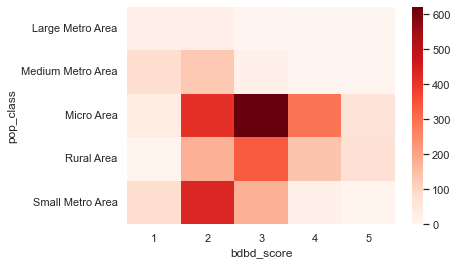

In [48]:
sns.heatmap(my_contingency_table, cmap="Reds")

<AxesSubplot:xlabel='bdbd_score', ylabel='pop_class'>

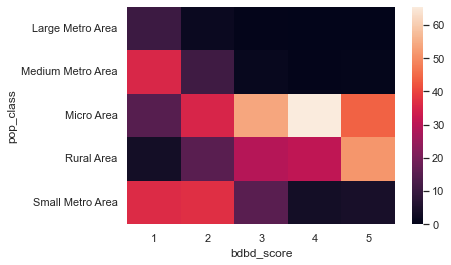

In [49]:
norm_con = pd.crosstab(index=bdbd_df["pop_class"], columns=bdbd_df["bdbd_score"], normalize="columns")*100
sns.heatmap(norm_con)

In [50]:
revised_analytic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3144 entries, 0 to 3143
Data columns (total 82 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    3143 non-null   object 
 1   pop_total                             3143 non-null   float64
 2   county                                3143 non-null   object 
 3   state                                 3144 non-null   object 
 4   pop_class                             3143 non-null   object 
 5   year                                  3132 non-null   float64
 6   broadband_pct                         3132 non-null   float64
 7   total_pop_enrolled                    827 non-null    float64
 8   percent_total_pop_enrolled            827 non-null    float64
 9   margin_total_pop                      827 non-null    float64
 10  est_total_households_frm_income       827 non-null    float64
 11  est_med_income_ho

In [51]:
#Selecting columns with the scores 
cols_to_sum = ["income_score", "desktop_rank", "smartphone_rank", 
            "portable_rank", "no_device_rank", "bdbd_score"]

# adding up all the scores created for a "total score"
revised_analytic_data["total_score"] = revised_analytic_data[cols_to_sum].sum(axis=1)

> NOTE: When the times comes with correct devices data scoring is incorporated, this can be regenerated and named as final.

In [52]:
#Exporting csv file
revised_analytic_data.to_csv(r'revised_analytic_dataset.csv', index = False)